In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import os
from tensorflow.keras.callbacks import History

In [2]:
def load_data(data_folder):
    reviews = []
    labels = []

    for label in ['pos', 'neg']:
        folder_path = os.path.join(data_folder, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append(review)
                labels.append(1 if label == 'pos' else 0)

    return reviews, labels

In [3]:
# Load and preprocess data
data_folder_train = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\train'  # Replace with the actual path to your dataset
data_folder_test = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\test'  # Replace with the actual path to your dataset


In [4]:
X_train, y_train = load_data(data_folder_train)
X_test, y_test = load_data(data_folder_test)
# Convert to numpy arrays
y_train, y_test = np.array(y_train), np.array(y_test)


In [5]:
from tensorflow.keras.callbacks import History

In [6]:
max_words = 10000  # Consider top 10,000 words in the vocabulary
max_len = 100  # Maximum length of a review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Vanilla

In [7]:
Vanilla_accuracy = []
Vanilla_loss = []

## State dim = 20


Epoch 1/5
157/157 [==============================] - 4s 20ms/step - loss: 0.5594 - accuracy: 0.7214 - val_loss: 0.6610 - val_accuracy: 0.6508
Epoch 2/5
157/157 [==============================] - 3s 18ms/step - loss: 0.3469 - accuracy: 0.8595 - val_loss: 0.6045 - val_accuracy: 0.7104
Epoch 3/5
157/157 [==============================] - 3s 19ms/step - loss: 0.2310 - accuracy: 0.9165 - val_loss: 0.7120 - val_accuracy: 0.6912
Epoch 4/5
157/157 [==============================] - 3s 21ms/step - loss: 0.1467 - accuracy: 0.9527 - val_loss: 0.5690 - val_accuracy: 0.7642
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5210 - accuracy: 0.8163
Test Loss: 0.5209833979606628, Test Accuracy: 0.81632000207901


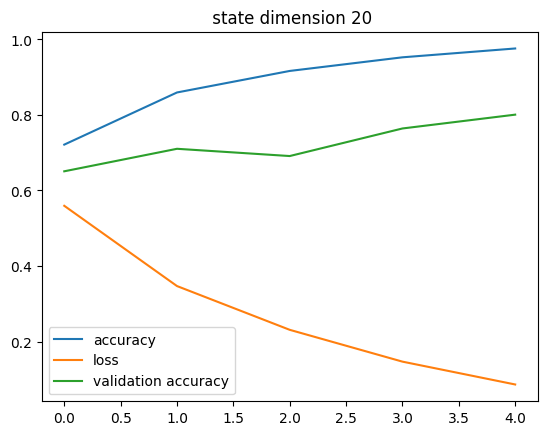

In [8]:
state_dim = 20
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model.add(SimpleRNN(state_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])
results = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(history.history)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
# plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
Vanilla_accuracy.append(results[1])
Vanilla_loss.append(results[0])
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()



## State dim = 50

Epoch 1/5
157/157 [==============================] - 5s 24ms/step - loss: 0.5969 - accuracy: 0.6745 - val_loss: 0.6567 - val_accuracy: 0.6312
Epoch 2/5
157/157 [==============================] - 4s 23ms/step - loss: 0.3280 - accuracy: 0.8615 - val_loss: 0.3715 - val_accuracy: 0.8422
Epoch 3/5
157/157 [==============================] - 4s 23ms/step - loss: 0.1735 - accuracy: 0.9369 - val_loss: 0.5425 - val_accuracy: 0.7678
Epoch 4/5
157/157 [==============================] - 4s 23ms/step - loss: 0.0713 - accuracy: 0.9784 - val_loss: 0.6643 - val_accuracy: 0.7690
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.6464 - accuracy: 0.8238
Test Loss: 0.646429717540741, Test Accuracy: 0.8238400220870972


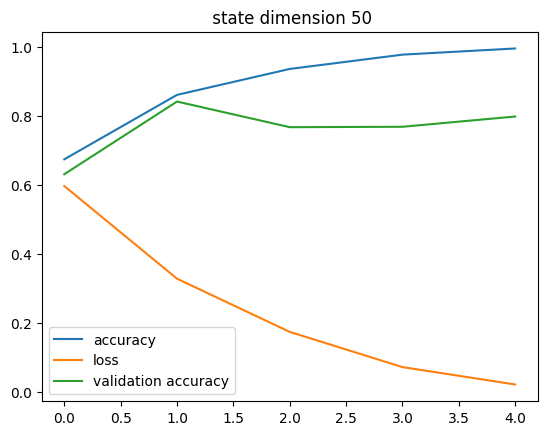

In [9]:
state_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model.add(SimpleRNN(state_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])
results = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(history.history)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
# plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
Vanilla_accuracy.append(results[1])
Vanilla_loss.append(results[0])
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()



## State dim = 100

Epoch 1/5
157/157 [==============================] - 7s 41ms/step - loss: 0.6521 - accuracy: 0.6255 - val_loss: 0.9168 - val_accuracy: 0.1298
Epoch 2/5
157/157 [==============================] - 6s 39ms/step - loss: 0.4395 - accuracy: 0.7965 - val_loss: 0.7748 - val_accuracy: 0.6246
Epoch 3/5
157/157 [==============================] - 6s 40ms/step - loss: 0.2319 - accuracy: 0.9092 - val_loss: 0.8187 - val_accuracy: 0.6826
Epoch 4/5
157/157 [==============================] - 6s 41ms/step - loss: 0.1088 - accuracy: 0.9631 - val_loss: 0.7987 - val_accuracy: 0.6882
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6765 - accuracy: 0.8023
Test Loss: 0.6764826774597168, Test Accuracy: 0.8022800087928772


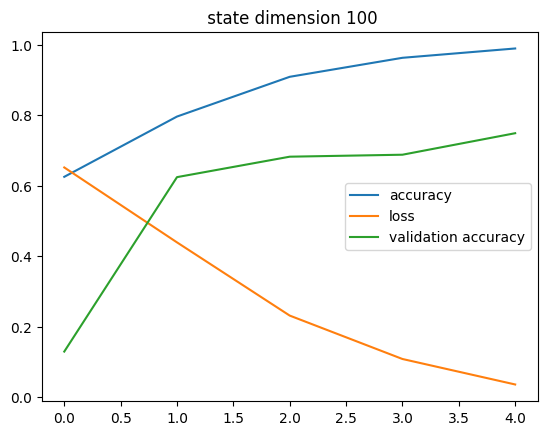

In [10]:
state_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model.add(SimpleRNN(state_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])
results = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(history.history)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
# plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
Vanilla_accuracy.append(results[1])
Vanilla_loss.append(results[0])
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()



## State dim = 200

Epoch 1/5
157/157 [==============================] - 17s 100ms/step - loss: 0.6506 - accuracy: 0.6334 - val_loss: 0.6358 - val_accuracy: 0.6250
Epoch 2/5
157/157 [==============================] - 14s 89ms/step - loss: 0.5628 - accuracy: 0.7111 - val_loss: 1.1533 - val_accuracy: 0.1476
Epoch 3/5
157/157 [==============================] - 14s 90ms/step - loss: 0.5887 - accuracy: 0.6876 - val_loss: 0.9453 - val_accuracy: 0.1896
Epoch 4/5
157/157 [==============================] - 14s 89ms/step - loss: 0.5176 - accuracy: 0.7493 - val_loss: 0.6569 - val_accuracy: 0.6276
Epoch 5/5
782/782 [==============================] - 12s 16ms/step - loss: 0.6257 - accuracy: 0.6975
Test Loss: 0.6256576180458069, Test Accuracy: 0.6974800229072571


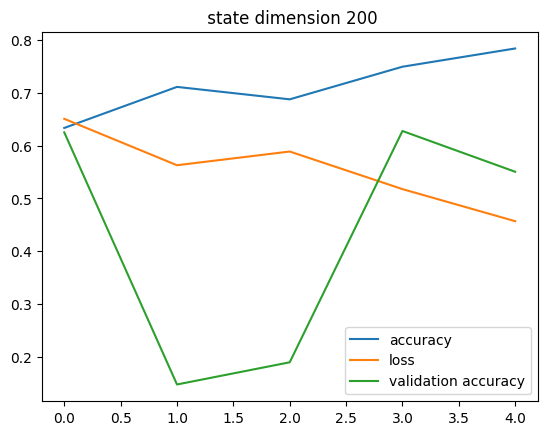

In [11]:
state_dim = 200
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model.add(SimpleRNN(state_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])
results = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(history.history)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
# plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
Vanilla_accuracy.append(results[1])
Vanilla_loss.append(results[0])
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()



## State dim = 500

Epoch 1/5
157/157 [==============================] - 43s 269ms/step - loss: 0.6729 - accuracy: 0.6115 - val_loss: 1.0943 - val_accuracy: 0.0040
Epoch 2/5
157/157 [==============================] - 41s 264ms/step - loss: 0.6037 - accuracy: 0.6697 - val_loss: 0.9686 - val_accuracy: 0.2614
Epoch 3/5
157/157 [==============================] - 42s 267ms/step - loss: 0.5278 - accuracy: 0.7379 - val_loss: 0.6637 - val_accuracy: 0.6104
Epoch 4/5
157/157 [==============================] - 40s 258ms/step - loss: 0.4597 - accuracy: 0.7848 - val_loss: 1.0445 - val_accuracy: 0.3908
Epoch 5/5
782/782 [==============================] - 31s 39ms/step - loss: 0.8737 - accuracy: 0.5854
Test Loss: 0.8737179636955261, Test Accuracy: 0.5853999853134155


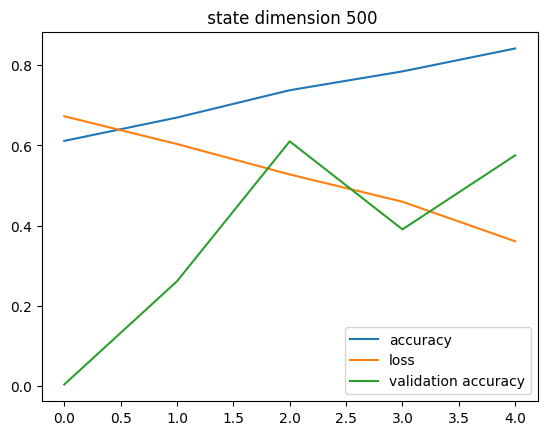

In [12]:
state_dim = 500
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model.add(SimpleRNN(state_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])
results = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')
# print(history.history)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
# plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
Vanilla_accuracy.append(results[1])
Vanilla_loss.append(results[0])
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()



# LSTM

In [13]:
LSTM_accuracy = []
LSTM_loss = []

## State dim = 20

Epoch 1/5
157/157 [==============================] - 8s 38ms/step - loss: 0.5370 - accuracy: 0.7191 - val_loss: 0.6658 - val_accuracy: 0.7610
Epoch 2/5
157/157 [==============================] - 5s 34ms/step - loss: 0.3184 - accuracy: 0.8752 - val_loss: 0.3249 - val_accuracy: 0.8938
Epoch 3/5
157/157 [==============================] - 5s 34ms/step - loss: 0.2272 - accuracy: 0.9146 - val_loss: 0.5879 - val_accuracy: 0.7864
Epoch 4/5
157/157 [==============================] - 5s 34ms/step - loss: 0.1695 - accuracy: 0.9415 - val_loss: 0.7345 - val_accuracy: 0.7434
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.4838 - accuracy: 0.8320
Test Loss: 0.4837510883808136, Test Accuracy: 0.8320000171661377


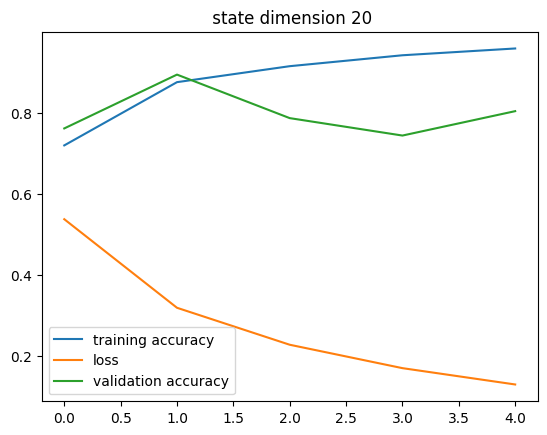

In [14]:
# Define LSTM model
state_dim = 20  # Experiment with different values (20, 50, 100, 200, 500)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model_lstm.add(LSTM(state_dim))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
# Train the LSTM model
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])

# Evaluate the LSTM model
results_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results_lstm[0]}, Test Accuracy: {results_lstm[1]}')
LSTM_accuracy.append(results_lstm[1])
LSTM_loss.append(results_lstm[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()


## State dim = 50

Epoch 1/5
157/157 [==============================] - 13s 73ms/step - loss: 0.4984 - accuracy: 0.7441 - val_loss: 0.6583 - val_accuracy: 0.6934
Epoch 2/5
157/157 [==============================] - 11s 68ms/step - loss: 0.2722 - accuracy: 0.8927 - val_loss: 0.4465 - val_accuracy: 0.8112
Epoch 3/5
157/157 [==============================] - 11s 68ms/step - loss: 0.2040 - accuracy: 0.9244 - val_loss: 0.5674 - val_accuracy: 0.7730
Epoch 4/5
157/157 [==============================] - 11s 68ms/step - loss: 0.1626 - accuracy: 0.9434 - val_loss: 0.7759 - val_accuracy: 0.7332
Epoch 5/5
782/782 [==============================] - 9s 12ms/step - loss: 0.5002 - accuracy: 0.8294
Test Loss: 0.500201940536499, Test Accuracy: 0.8294399976730347


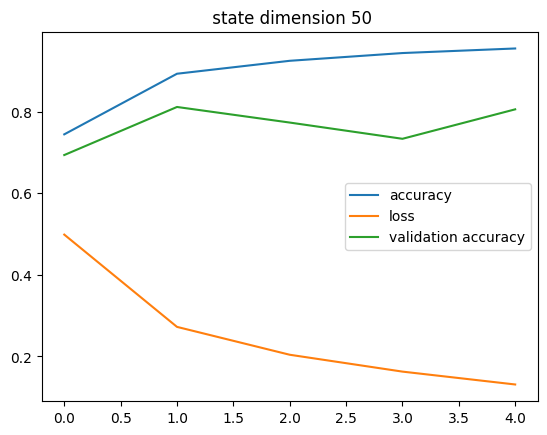

In [15]:
# Define LSTM model
state_dim = 50  # Experiment with different values (20, 50, 100, 200, 500)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model_lstm.add(LSTM(state_dim))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
# Train the LSTM model
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])

# Evaluate the LSTM model
results_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results_lstm[0]}, Test Accuracy: {results_lstm[1]}')
LSTM_accuracy.append(results_lstm[1])
LSTM_loss.append(results_lstm[0])
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()


## State dim = 100

Epoch 1/5
157/157 [==============================] - 37s 222ms/step - loss: 0.4769 - accuracy: 0.7617 - val_loss: 0.3362 - val_accuracy: 0.8356
Epoch 2/5
157/157 [==============================] - 30s 191ms/step - loss: 0.2579 - accuracy: 0.8975 - val_loss: 0.5263 - val_accuracy: 0.7484
Epoch 3/5
157/157 [==============================] - 29s 188ms/step - loss: 0.2056 - accuracy: 0.9225 - val_loss: 0.4762 - val_accuracy: 0.7958
Epoch 4/5
157/157 [==============================] - 30s 190ms/step - loss: 0.1647 - accuracy: 0.9406 - val_loss: 0.4868 - val_accuracy: 0.8118
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5339 - accuracy: 0.8272
Test Loss: 0.533883810043335, Test Accuracy: 0.8271600008010864


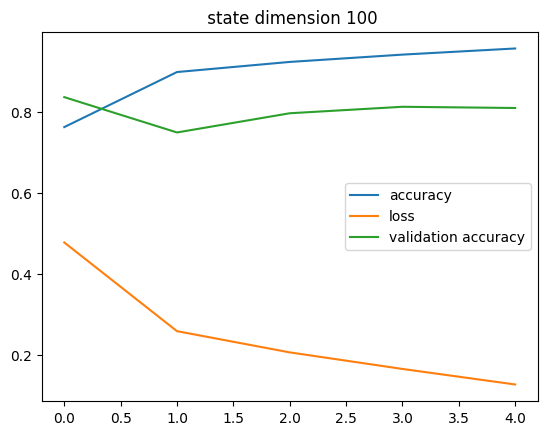

In [16]:
# Define LSTM model
state_dim = 100  # Experiment with different values (20, 50, 100, 200, 500)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model_lstm.add(LSTM(state_dim))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
# Train the LSTM model
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])

# Evaluate the LSTM model
results_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results_lstm[0]}, Test Accuracy: {results_lstm[1]}')
LSTM_accuracy.append(results_lstm[1])
LSTM_loss.append(results_lstm[0])
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()


## State dim = 200

Epoch 1/5
157/157 [==============================] - 45s 272ms/step - loss: 0.4931 - accuracy: 0.7508 - val_loss: 0.4122 - val_accuracy: 0.7942
Epoch 2/5
157/157 [==============================] - 38s 244ms/step - loss: 0.2757 - accuracy: 0.8893 - val_loss: 0.4341 - val_accuracy: 0.7994
Epoch 3/5
157/157 [==============================] - 39s 247ms/step - loss: 0.2095 - accuracy: 0.9193 - val_loss: 0.3544 - val_accuracy: 0.8548
Epoch 4/5
157/157 [==============================] - 39s 246ms/step - loss: 0.1539 - accuracy: 0.9450 - val_loss: 0.5690 - val_accuracy: 0.7820
Epoch 5/5
782/782 [==============================] - 24s 30ms/step - loss: 0.5006 - accuracy: 0.8286
Test Loss: 0.50063157081604, Test Accuracy: 0.8285999894142151


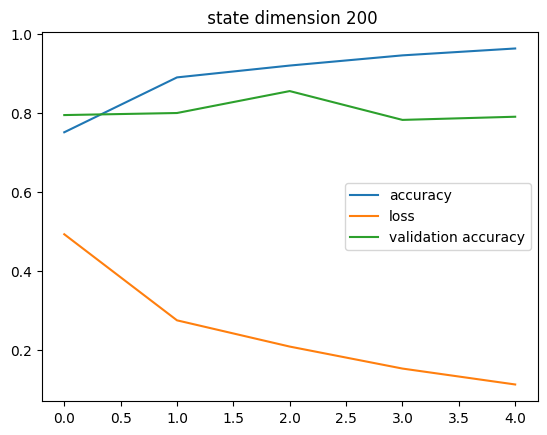

In [17]:
# Define LSTM model
state_dim = 200  # Experiment with different values (20, 50, 100, 200, 500)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model_lstm.add(LSTM(state_dim))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
# Train the LSTM model
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])

# Evaluate the LSTM model
results_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results_lstm[0]}, Test Accuracy: {results_lstm[1]}')
LSTM_accuracy.append(results_lstm[1])
LSTM_loss.append(results_lstm[0])
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()


## State dim = 500

Epoch 1/5
157/157 [==============================] - 138s 866ms/step - loss: 0.5320 - accuracy: 0.7341 - val_loss: 0.7593 - val_accuracy: 0.6542
Epoch 2/5
157/157 [==============================] - 133s 847ms/step - loss: 0.2969 - accuracy: 0.8779 - val_loss: 0.4460 - val_accuracy: 0.7966
Epoch 3/5
157/157 [==============================] - 138s 879ms/step - loss: 0.2308 - accuracy: 0.9123 - val_loss: 0.6213 - val_accuracy: 0.7324
Epoch 4/5
157/157 [==============================] - 149s 952ms/step - loss: 0.1875 - accuracy: 0.9316 - val_loss: 0.5811 - val_accuracy: 0.7802
Epoch 5/5
782/782 [==============================] - 141s 181ms/step - loss: 0.4681 - accuracy: 0.8275
Test Loss: 0.46811026334762573, Test Accuracy: 0.8274800181388855


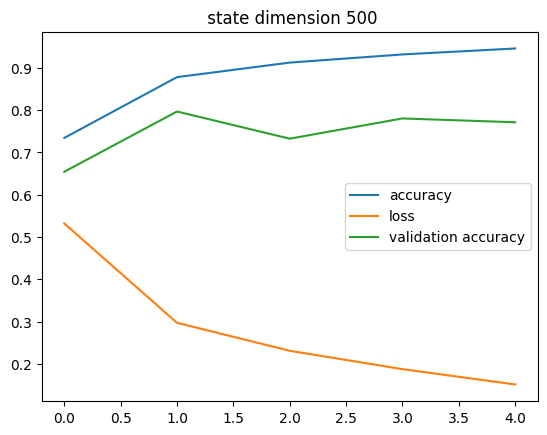

In [18]:
# Define LSTM model
state_dim = 500  # Experiment with different values (20, 50, 100, 200, 500)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Adjust output_dim as needed
model_lstm.add(LSTM(state_dim))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = History()
# Train the LSTM model
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2,callbacks = [history])

# Evaluate the LSTM model
results_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'Test Loss: {results_lstm[0]}, Test Accuracy: {results_lstm[1]}')
LSTM_accuracy.append(results_lstm[1])
LSTM_loss.append(results_lstm[0])
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()


# Vanilla vs LSTM


In [19]:
dimensions = [20,50,100,200,500]

Text(0.5, 1.0, 'LSTM vs Vanilla accuracy')

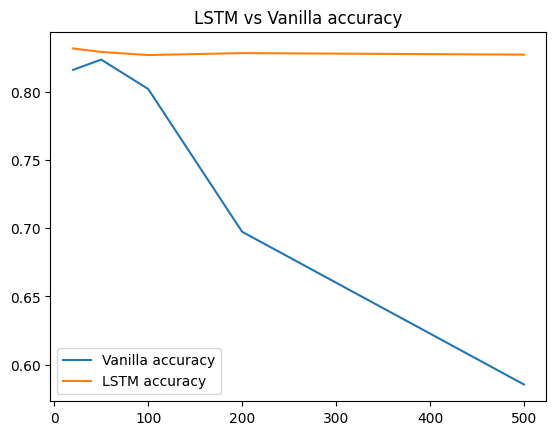

In [20]:
plt.plot(dimensions,Vanilla_accuracy,label='Vanilla accuracy')
plt.plot(dimensions,LSTM_accuracy,label = 'LSTM accuracy')
plt.legend()
plt.title('LSTM vs Vanilla accuracy')

Text(0.5, 1.0, 'LSTM vs Vanilla loss')

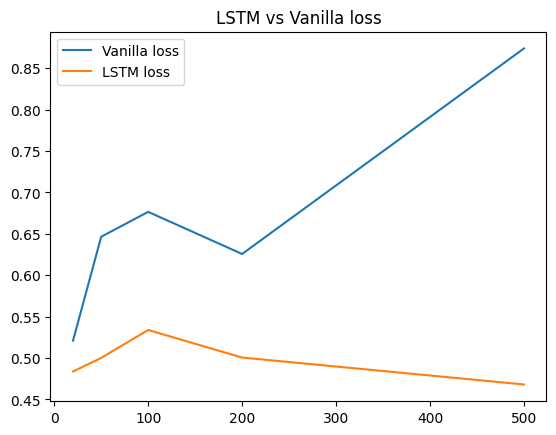

In [21]:
plt.plot(dimensions,Vanilla_loss,label='Vanilla loss')
plt.plot(dimensions,LSTM_loss,label = 'LSTM loss')
plt.legend()
plt.title('LSTM vs Vanilla loss')